## Author:- Abhishek Kumar

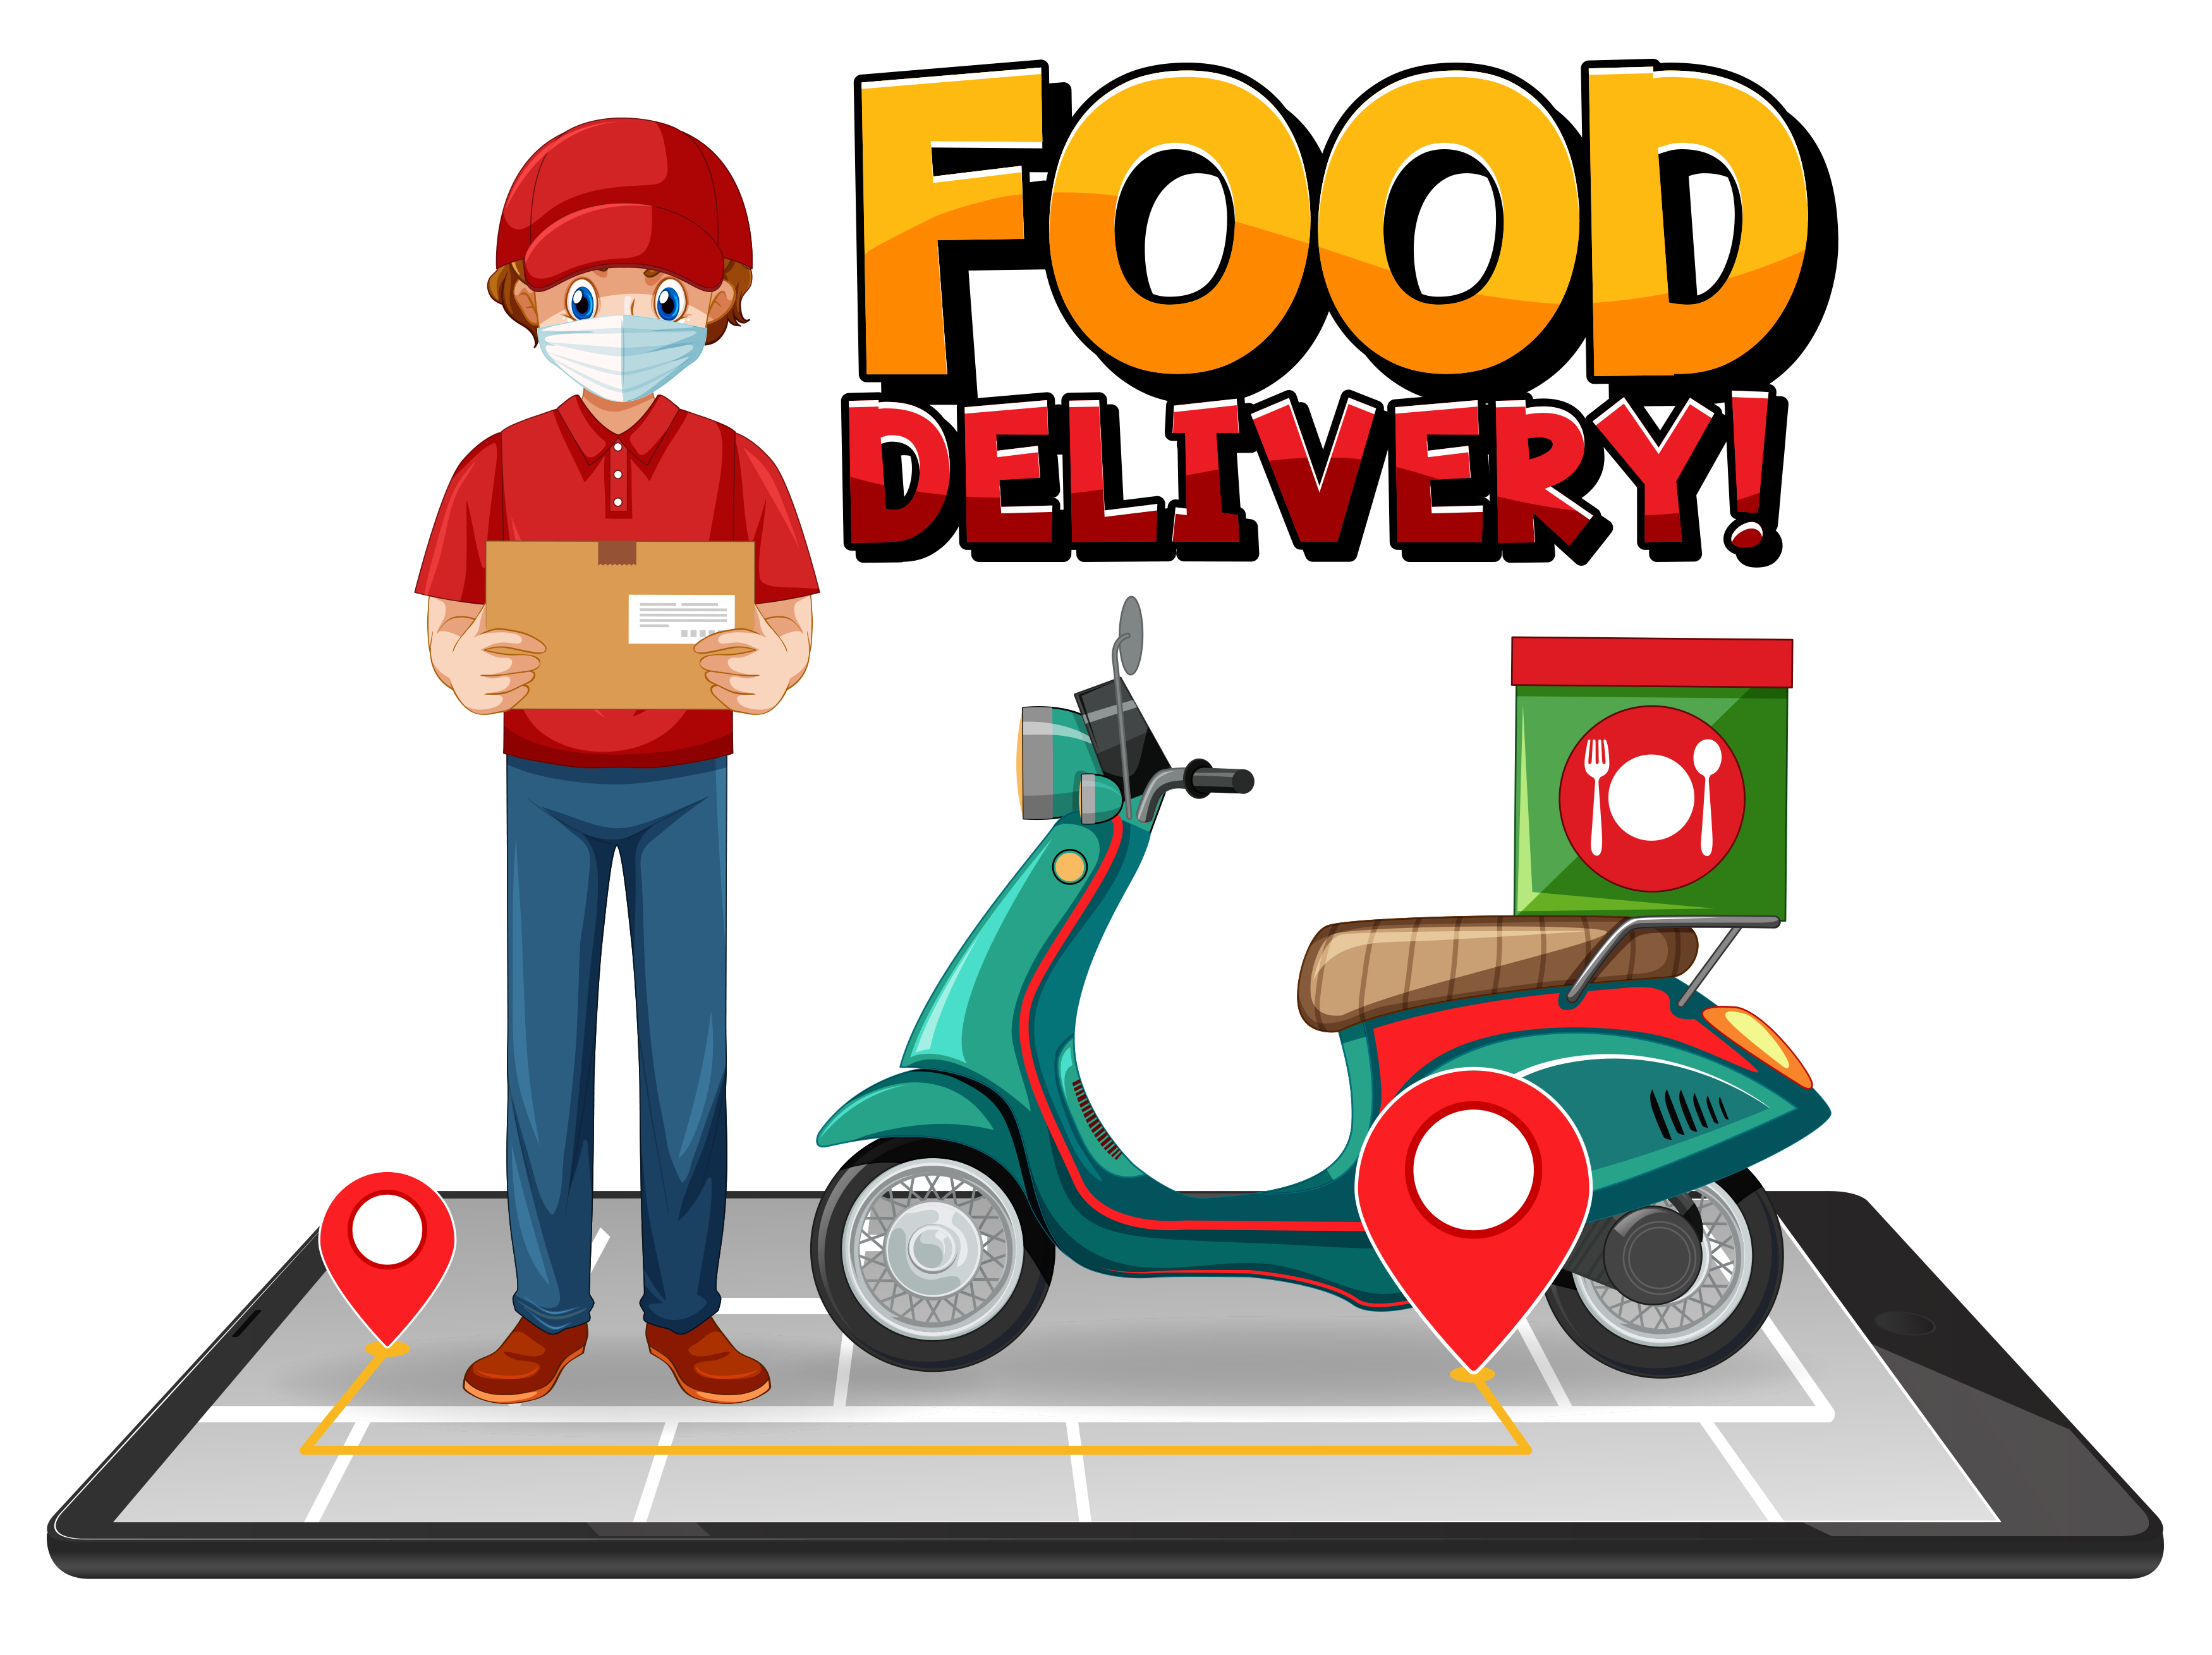

### Step 1:- Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Step 2:- Read the CSV File from the FOOD DELIVERY DATASET

In [2]:
df = pd.read_csv("food delivery costs.csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


### 3. Data Pre processing

In [4]:
# Changing order dates to Datetime order
df["Order Date and Time"] = pd.to_datetime(df['Order Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   object        
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory 

In [5]:
# Changing delivery dates to Datetime order
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [6]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


### 3.1. Converting % into Cost in Discounts and Offers column

In [7]:
def extract(value):
    a = str(value).split(" ")
    return a[0]

df["Discounts and Offers"] = df["Discounts and Offers"].apply(extract)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,nan,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0


In [8]:
def removep(value):
    if "%" in value:
        a = value.replace("%","")
        return float(a)
    else:
        return float(value)

df["Discounts and Offers"] = df["Discounts and Offers"].apply(removep)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5.0,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10.0,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15.0,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.0,130,50,0


In [9]:
# converting percent into cost
df.loc[(df["Discounts and Offers"] <= 15),"Discounts and Offers" ] = (df["Discounts and Offers"]/100) * df["Order Value"]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0


### 3.2. Filling Null values

In [10]:
df["Discounts and Offers"]=df["Discounts and Offers"].fillna(0)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   float64       
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), objec

### 4. Exploratory Data Analysis

In [12]:
# Adding Delivery Fee, Discounts and Offers, Payment Processing Fee to create a new column Cost
df["Costs"] = df["Delivery Fee"] + df['Discounts and Offers'] + df["Payment Processing Fee"]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,142.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,161.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,215.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0,77.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,130.00


In [13]:
# to know whether the business in profit or loss
df["Profit or Loss"] = df["Commission Fee"] - df['Costs']
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit or Loss
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00


In [14]:
df["Profit or Loss"].sum()

-5751.85

In [15]:
cost_dist = df[["Delivery Fee", "Payment Processing Fee", "Discounts and Offers"]].sum()
cost_dist

Delivery Fee              28620.00
Payment Processing Fee    29832.00
Discounts and Offers      74289.85
dtype: float64

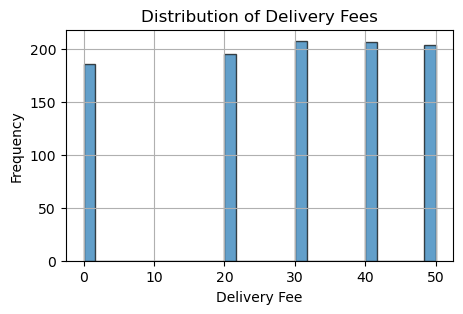

In [16]:
# Histogram for Distribution of Delivery Fees
plt.figure(figsize=(5, 3))
plt.hist(df['Delivery Fee'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Delivery Fees')
plt.xlabel('Delivery Fee')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

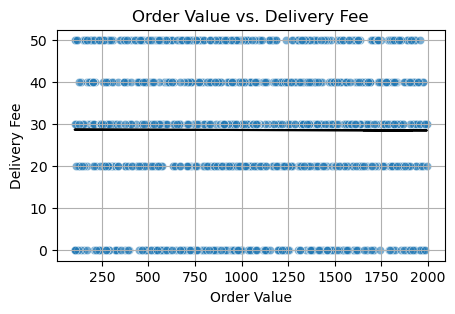

In [17]:
# Scatter Plot of Order Value vs. Delivery Fee with Trendline
plt.figure(figsize=(5, 3))
plt.scatter(df['Order Value'], df['Delivery Fee'], alpha=0.6, edgecolor='w', linewidth=0.5)

z = np.polyfit(df['Order Value'], df['Delivery Fee'], 1)
p = np.poly1d(z)
plt.plot(df['Order Value'], p(df['Order Value']), color='black')

plt.title('Order Value vs. Delivery Fee')
plt.xlabel('Order Value')
plt.ylabel('Delivery Fee')
plt.grid(True)
plt.show()


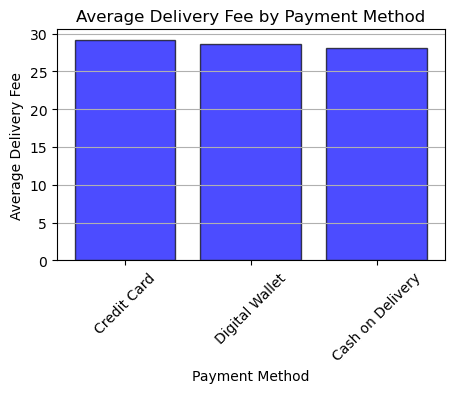

In [18]:
# Bar Chart of Average Delivery Fee by Payment Method
payment_methods = df['Payment Method'].unique()
avg_delivery_fee = [df[df['Payment Method'] == method]['Delivery Fee'].mean() for method in payment_methods]

plt.figure(figsize=(5, 3))
plt.bar(payment_methods, avg_delivery_fee, color='blue', edgecolor='k', alpha=0.7)
plt.title('Average Delivery Fee by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Delivery Fee')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

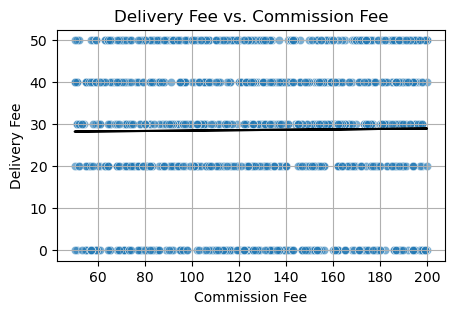

In [62]:
# Scatter Plot of Delivery Fee vs. Commission Fee
plt.figure(figsize=(5, 3))
plt.scatter(df['Commission Fee'], df['Delivery Fee'], alpha=0.6, edgecolor='w', linewidth=0.5)

z = np.polyfit(df['Commission Fee'], df['Delivery Fee'], 1)
p = np.poly1d(z)
plt.plot(df['Commission Fee'], p(df['Commission Fee']), color='Black')

plt.title('Delivery Fee vs. Commission Fee')
plt.xlabel('Commission Fee')
plt.ylabel('Delivery Fee')
plt.grid(True)
plt.show()

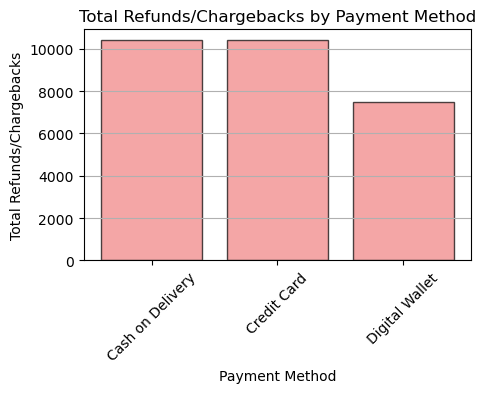

In [63]:
# Bar Chart of Total Refunds/Chargebacks by Payment Method
refunds_by_payment = df.groupby('Payment Method')['Refunds/Chargebacks'].sum()

plt.figure(figsize=(5, 3))
plt.bar(refunds_by_payment.index, refunds_by_payment.values, color='lightcoral', edgecolor='k', alpha=0.7)
plt.title('Total Refunds/Chargebacks by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Refunds/Chargebacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

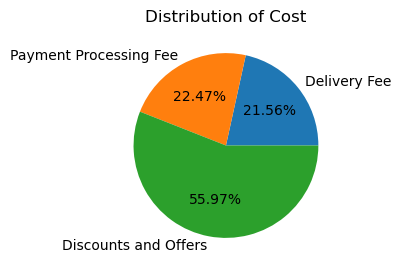

In [19]:
# pie chart for distribution of cost
plt.figure(figsize = (5,3))
plt.pie(cost_dist, labels = cost_dist.index, autopct = "%1.2f%%")
plt.title('Distribution of Cost')
plt.show()

In [21]:
abc = df[["Commission Fee", "Costs","Profit or Loss"]].sum()
abc

Commission Fee    126990.00
Costs             132741.85
Profit or Loss     -5751.85
dtype: float64

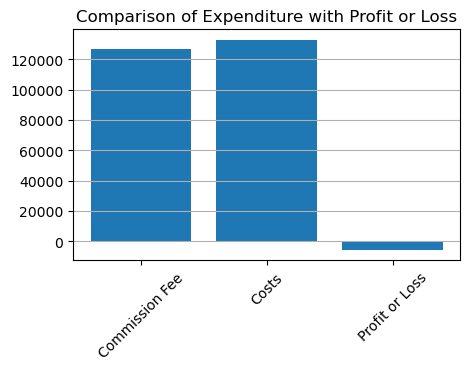

In [22]:
# Bar chart to compare Commission fee, Costs, Profit
plt.figure(figsize = (5,3))
plt.bar(abc.index, abc)
plt.title('Comparison of Expenditure with Profit or Loss')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.show()

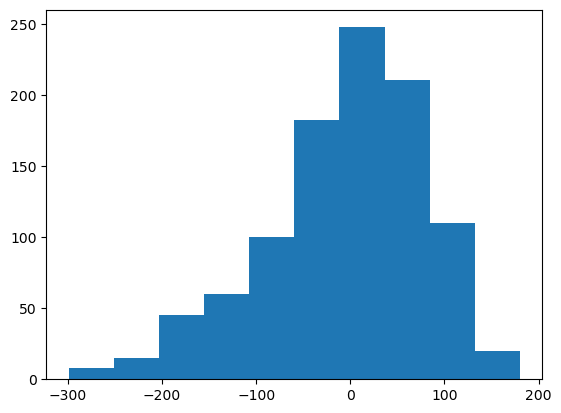

In [23]:
#Histogram of Profit
plt.hist(df["Profit or Loss"])
plt.show()

### Conclusion:-

The total calculated loss is ₹5,751.85, indicating that the food 
delivery service is currently not profitable

## THANK YOU